<a href="https://colab.research.google.com/github/535amar/CMP-7005-Final-Assignment/blob/main/Final_Assignment_CMP7005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CMP7005-PRAC1 Indian Air Quality**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality'

/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality


In [3]:
%ls

Ahmedabad_data.csv       Chennai_data.csv     Kolkata_data.csv
Aizawl_data.csv          Coimbatore_data.csv  Lucknow_data.csv
all_cities_combined.csv  Delhi_data.csv       Mumbai_data.csv
all_cities_merged.csv    Ernakulam_data.csv   Patna_data.csv
Amaravati_data.csv       Gurugram_data.csv    Shillong_data.csv
Amritsar_data.csv        Guwahati_data.csv    Talcher_data.csv
Bengaluru_data.csv       Hyderabad_data.csv   Thiruvananthapuram_data.csv
Bhopal_data.csv          Jaipur_data.csv      Visakhapatnam_data.csv
Brajrajnagar_data.csv    Jorapokhar_data.csv
Chandigarh_data.csv      Kochi_data.csv


In [4]:
# Imports for this file
import pandas as pd
import numpy as np
import glob
import os

# For nicer Display
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


Task-1 Data handling

In [5]:
csv_files = glob.glob("/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/*_data.csv")
print("Number of CSV files found:", len(csv_files))



Number of CSV files found: 26


In [6]:
# Sorting file list
csv_files = sorted(csv_files)
print("Files found:")
for f in csv_files:
    print("  -", os.path.basename(f))

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv


In [7]:
import pandas as pd
import numpy as np
import glob
import os

data_path = "/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/*.csv"

# Find all CSV files in the folder
csv_files = [f for f in glob.glob(data_path) if "all_cities_combined" not in f]

print("Number of CSV files found:", len(csv_files))

csv_files = sorted(csv_files)
print("\nFiles found:")
for f in csv_files:
    print("  -", os.path.basename(f))

# Merge all datasets
df_list = []

for file_path in csv_files:
    file_name = os.path.basename(file_path)
    city_name = file_name.replace("_data.csv", "")

    print(f"\nLoading: {city_name}")

    df_city = pd.read_csv(file_path)
    df_city["City"] = city_name

    df_list.append(df_city)

all_data = pd.concat(df_list, ignore_index=True)

print("\n Merged dataset created successfully!")
print("Shape:", all_data.shape)

# Save merged dataset back to Drive
merged_save_path = "/content/drive/MyDrive/Colab/Programming for Data Analysis/CMP 7005 Air quality/all_cities_merged.csv"
all_data.to_csv(merged_save_path, index=False)

print("\nMerged file saved to:", merged_save_path)


Number of CSV files found: 27

Files found:
  - Ahmedabad_data.csv
  - Aizawl_data.csv
  - Amaravati_data.csv
  - Amritsar_data.csv
  - Bengaluru_data.csv
  - Bhopal_data.csv
  - Brajrajnagar_data.csv
  - Chandigarh_data.csv
  - Chennai_data.csv
  - Coimbatore_data.csv
  - Delhi_data.csv
  - Ernakulam_data.csv
  - Gurugram_data.csv
  - Guwahati_data.csv
  - Hyderabad_data.csv
  - Jaipur_data.csv
  - Jorapokhar_data.csv
  - Kochi_data.csv
  - Kolkata_data.csv
  - Lucknow_data.csv
  - Mumbai_data.csv
  - Patna_data.csv
  - Shillong_data.csv
  - Talcher_data.csv
  - Thiruvananthapuram_data.csv
  - Visakhapatnam_data.csv
  - all_cities_merged.csv

Loading: Ahmedabad

Loading: Aizawl

Loading: Amaravati

Loading: Amritsar

Loading: Bengaluru

Loading: Bhopal

Loading: Brajrajnagar

Loading: Chandigarh

Loading: Chennai

Loading: Coimbatore

Loading: Delhi

Loading: Ernakulam

Loading: Gurugram

Loading: Guwahati

Loading: Hyderabad

Loading: Jaipur

Loading: Jorapokhar

Loading: Kochi

Load

**Task 1 Data Handling Review**

In this step, I combined multiple city-wise air quality datasets into a single master DataFrame. Each CSV file represents measurements from one Indian city and follows a similar column structure.

To avoid hard-coding file names, I used the `glob` library to automatically detect all files ending with `_data.csv` in the working directory. For each file, I extracted the city name from the filename (e.g. `Ahmedabad_data.csv` → `Ahmedabad`) and stored it in a new `City` column. I then loaded each CSV into a separate pandas DataFrame and concatenated all of them into one dataset called `all_data`.

This merged dataset contains air quality measurements for multiple cities across India and will be used as the basis for all further exploratory analysis and modelling.


Fundamental Data Understanding
**bold text**
After constructing the merged dataset, I performed an initial exploration to understand its structure and quality. I inspected the first few rows, checked the overall shape (number of rows and columns), and listed all column names. I also examined data types and non-null counts to identify which variables are numerical and which contain missing values.

Using `describe()`, I generated summary statistics for the numerical features to get a sense of their typical ranges and variability. I then calculated the number of missing values per column and counted duplicate rows. Finally, I verified that the `City` column correctly lists all the different cities present in the dataset, and I converted the `Date` column to a proper datetime format.

This fundamental understanding step helps to reveal potential data quality issues (such as missing or inconsistent values) and confirms that the merging process across multiple city files was successful.


In [8]:
# Finding missing values per column
print(all_data.isna().sum())


City              0
Date              0
PM2.5         22990
PM10          55700
NO            17910
NO2           17925
NOx           20925
NH3           51640
CO            10295
SO2           19270
O3            20110
Benzene       28115
Toluene       40205
Xylene        90545
AQI           23405
AQI_Bucket    23405
dtype: int64


→ Key Observations:
- *Xylene* has extremely high missing values around92%, its not usabale, so should be droped
- *PM10, NH3, Toluene* also have the large gaps but still usable after imputation
- *AQI* and *AQI_Bucket* missing together
- City and Data are complete

In [9]:
# Task 2 Data Pre-processing
clean_data = all_data.copy()

# 1. Drop columns with extremely high missing values
threshold = 0.80  # drop columns with >80% missing values
cols_to_drop = []

for col in clean_data.columns:
    missing_ratio = clean_data[col].isna().mean()
    if missing_ratio > threshold:
        cols_to_drop.append(col)

print("Columns dropped due to excessive missing values:", cols_to_drop)

clean_data.drop(columns=cols_to_drop, inplace=True, errors="ignore")

# 2. Convert Date column to datetime
clean_data["Date"] = pd.to_datetime(clean_data["Date"], errors="coerce")

# Extract Year & Month for analysis
clean_data["Year"] = clean_data["Date"].dt.year
clean_data["Month"] = clean_data["Date"].dt.month


# 3. Remove duplicate rows
duplicates = clean_data.duplicated().sum()
print("Duplicate rows:", duplicates)

clean_data.drop_duplicates(inplace=True)

# 4. City-wise median imputation for pollutants

pollutant_columns = [
    col for col in clean_data.columns
    if col not in ["City", "Date", "AQI_Bucket", "Year", "Month"]
    and clean_data[col].dtype != "object"
]

print("Numeric pollutant columns to impute:", pollutant_columns)

# Apply median imputation grouped by city
for col in pollutant_columns:
    clean_data[col] = clean_data.groupby("City")[col].transform(
        lambda x: x.fillna(x.median())
    )


# 5. Fix AQI and AQI_Bucket issues
# Simple fill of AQI missing using city median (baseline approach)
if "AQI" in clean_data.columns:
    clean_data["AQI"] = clean_data.groupby("City")["AQI"].transform(
        lambda x: x.fillna(x.median())
    )

# If AQI_Bucket still missing, fill with "Unknown"
if "AQI_Bucket" in clean_data.columns:
    clean_data["AQI_Bucket"] = clean_data["AQI_Bucket"].fillna("Unknown")

print("\nPre-processing complete!")
print("Final dataset shape:", clean_data.shape)


Columns dropped due to excessive missing values: []
Duplicate rows: 91630
Numeric pollutant columns to impute: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

Pre-processing complete!
Final dataset shape: (56025, 18)


-from the all the data set i cleaned and prepared the merged datast. The first issue i found in the data handling step was the presence of missing values across almost all pollutant columns. Some variables such as Xylene contained more than 90% missing values, making them unsutable for analysis or modeling so this column was removed entirely.

-For the remaing numerical varible i applied a city wise median imputation strategy. Air quality levels vary signficantly between cities therefore, calculating a global median could bias the dataset. Using a per-city median ensures the imputed values reflect the local pollution characteristics.

-Duplicated rows were also checked and removed.

Task2 c - **Statistical and Visual Analysis**

In this section, I use a range of visualisation techniques to better understand the distribution of pollutants, compare air quality across cities, and explore relationships between variables. The analysis includes univariate distribution plots, city-level comparison charts, time series trends, and a correlation heatmap. All plots are designed with a clean, minimal style suitable for technical reporting.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Theme
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

plt.rcParams["figure.figsize"] = (11, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["figure.autolayout"] = True

# confirm columns:
clean_data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene',
       'AQI', 'AQI_Bucket', 'Year', 'Month'],
      dtype='object')

1 Univariate analysis - distrubutions of key pollutants



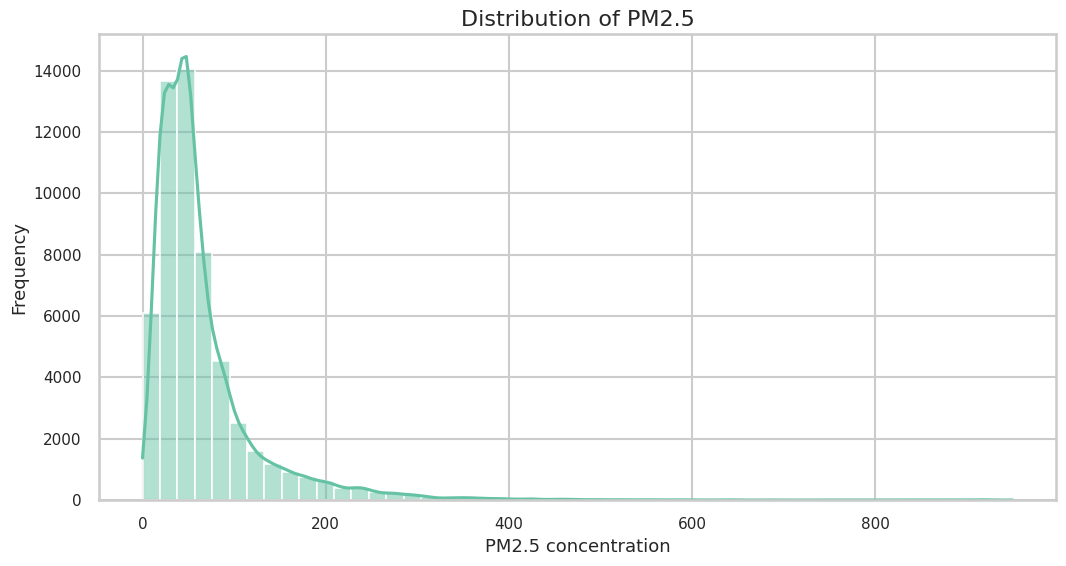

In [11]:
# Distribution of PM2.5
plt.figure()
sns.histplot(clean_data["PM2.5"], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


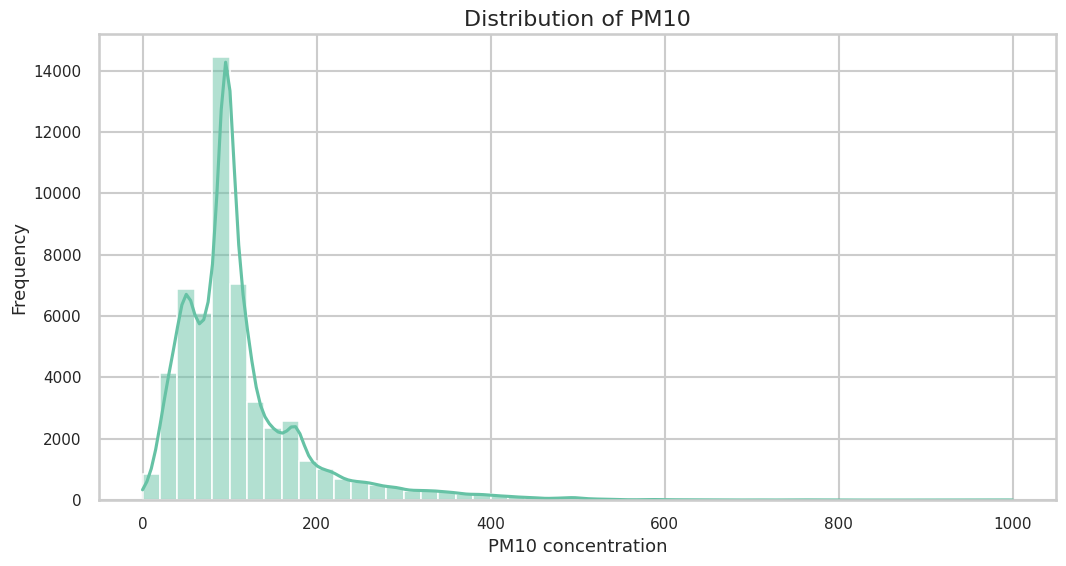

In [12]:
# PM10 distibution
plt.figure()
sns.histplot(clean_data["PM10"], bins=50, kde=True)
plt.title("Distribution of PM10")
plt.xlabel("PM10 concentration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


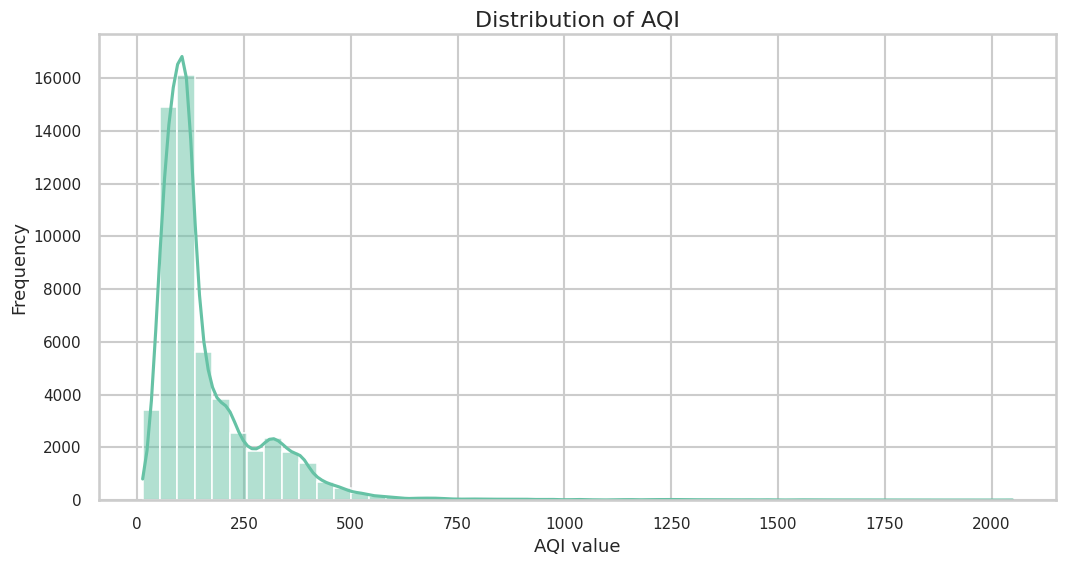

In [13]:
# AQI distribution
plt.figure()
sns.histplot(clean_data["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### City-level comparison

To compare air quality between locations, I calculated the average PM2.5 and AQI for each city and visualised the top 10 most polluted cities. The bar charts show clear variability in air quality across cities, with some locations consistently exhibiting higher average concentrations and AQI values than others.

This comparison highlights which cities experience poorer air quality on average and motivates more detailed time-based analysis in later steps.


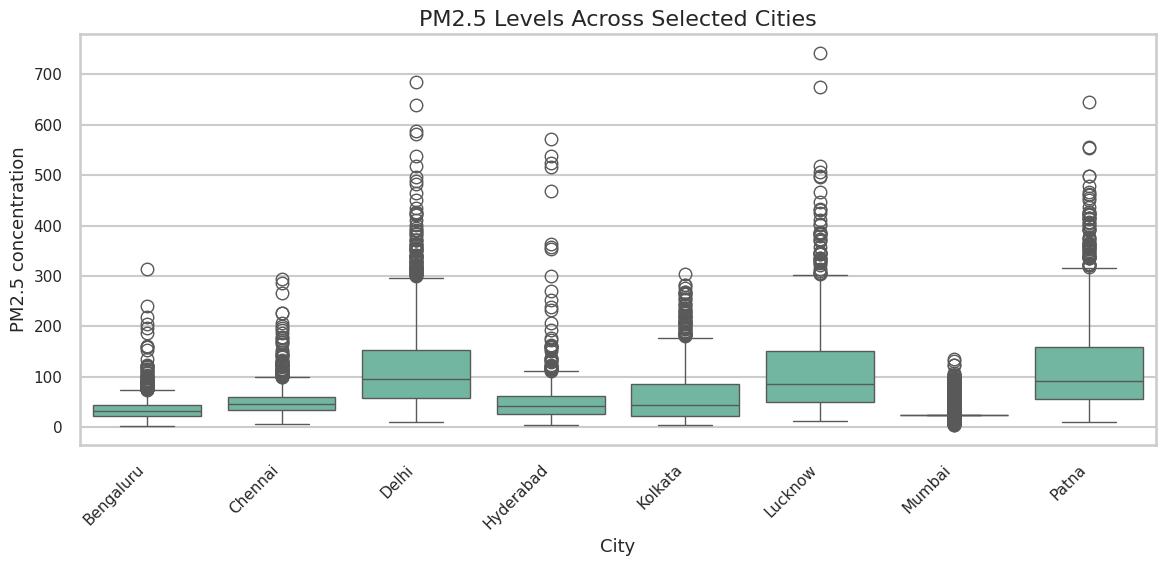

In [14]:
selected_cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Hyderabad", "Bengaluru", "Lucknow", "Patna"]

subset = clean_data[clean_data["City"].isin(selected_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="City", y="PM2.5", data=subset)
plt.title("PM2.5 Levels Across Selected Cities")
plt.xlabel("City")
plt.ylabel("PM2.5 concentration")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#### Variability of PM2.5 across selected cities

I used boxplots to compare the distribution of PM2.5 values across a set of major Indian cities. The boxplots illustrate both the central tendency and the spread of pollution levels, as well as the presence of extreme outliers.

Some cities show a wider spread and more extreme upper outliers, indicating more volatile air quality with frequent high-pollution events. Others appear more stable, with a tighter interquartile range.


2c.3 Variability Across cities

/tmp/ipython-input-157148576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City", y="PM2.5", data=subset, palette="Accent")


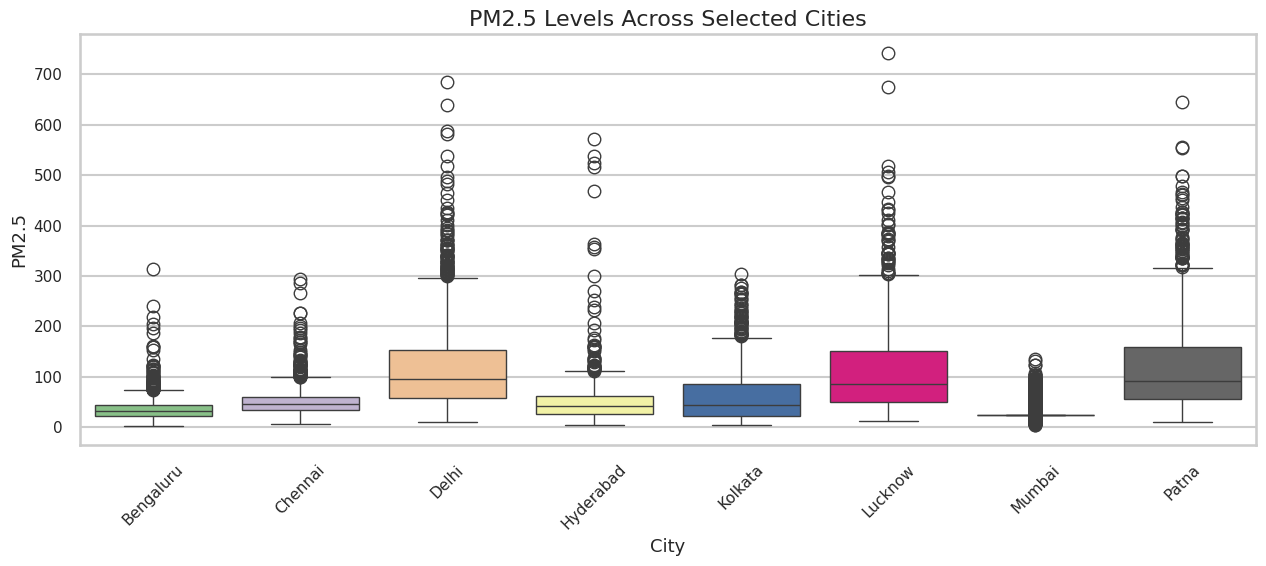

In [15]:
cities = ["Delhi", "Mumbai", "Kolkata", "Chennai", "Hyderabad", "Bengaluru", "Lucknow", "Patna"]
subset = clean_data[clean_data["City"].isin(cities)]

plt.figure(figsize=(13,6))
sns.boxplot(x="City", y="PM2.5", data=subset, palette="Accent")
plt.title("PM2.5 Levels Across Selected Cities")
plt.xticks(rotation=45)
plt.show()


2c.4 Seasonal and temporal analysis

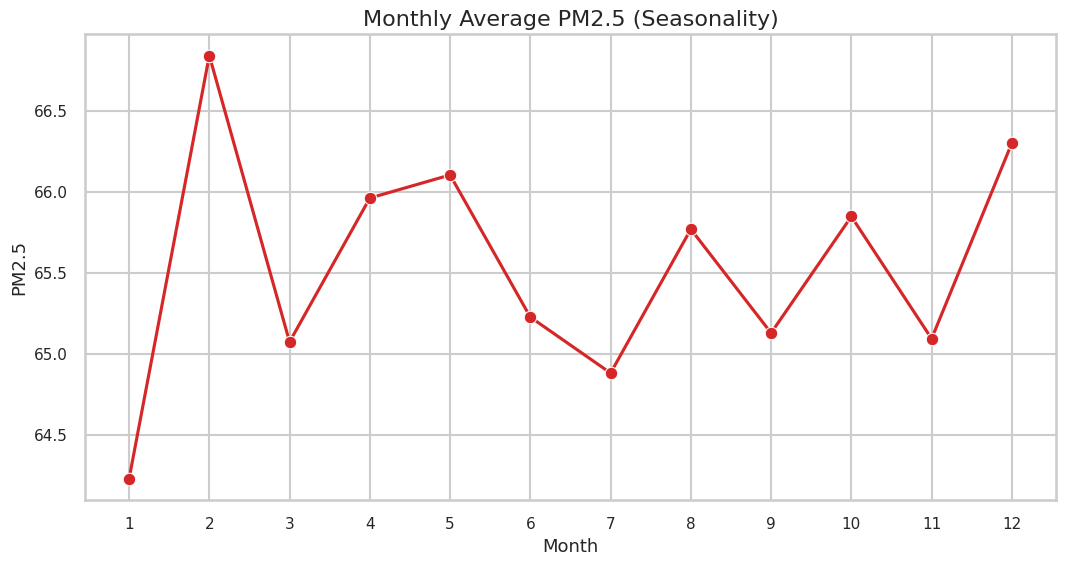

In [16]:
monthly_pm25 = clean_data.groupby("Month")["PM2.5"].mean()

plt.figure()
sns.lineplot(x=monthly_pm25.index, y=monthly_pm25.values, marker="o", color="tab:red")
plt.title("Monthly Average PM2.5 (Seasonality)")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.xticks(range(1,13))
plt.show()


The monthly average PM2.5 trend reveals clear seasonality in air quality. Pollution levels tend to increase during the winter months (typically November to January) and decrease during the monsoon and post-monsoon periods.

This seasonal pattern is consistent with known atmospheric behaviour in India. Winter months often trap pollutants close to the ground due to temperature inversion, while rainfall during the monsoon helps reduce airborne particulate matter. The shape of this trend reinforces the need to account for seasonality when analysing or forecasting air quality.


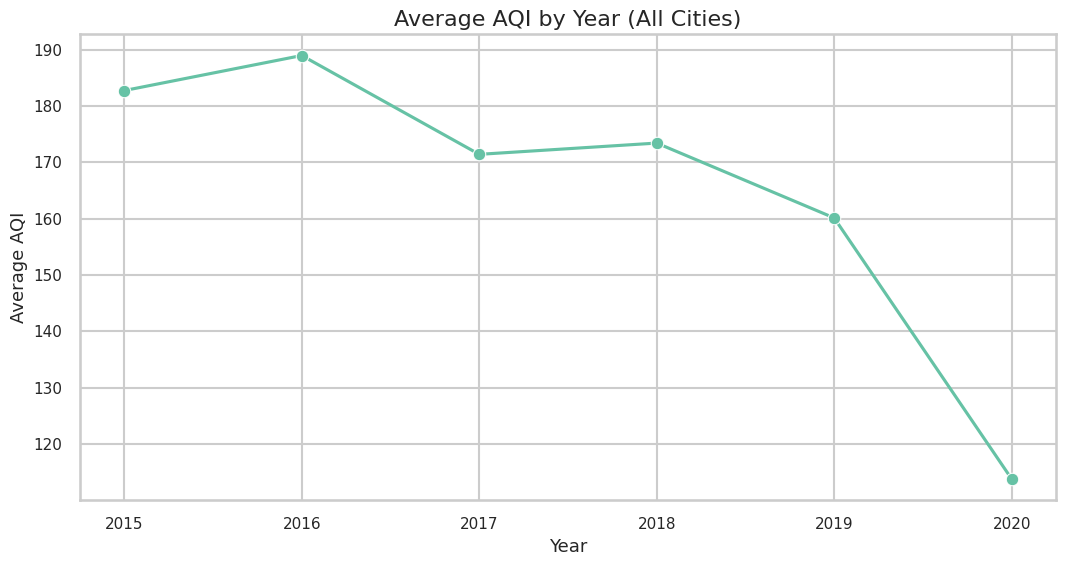

In [17]:
# Overall yearly mean AQI
yearly_aqi = clean_data.groupby("Year")["AQI"].mean()

plt.figure()
sns.lineplot(x=yearly_aqi.index, y=yearly_aqi.values, marker="o")
plt.title("Average AQI by Year (All Cities)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.show()


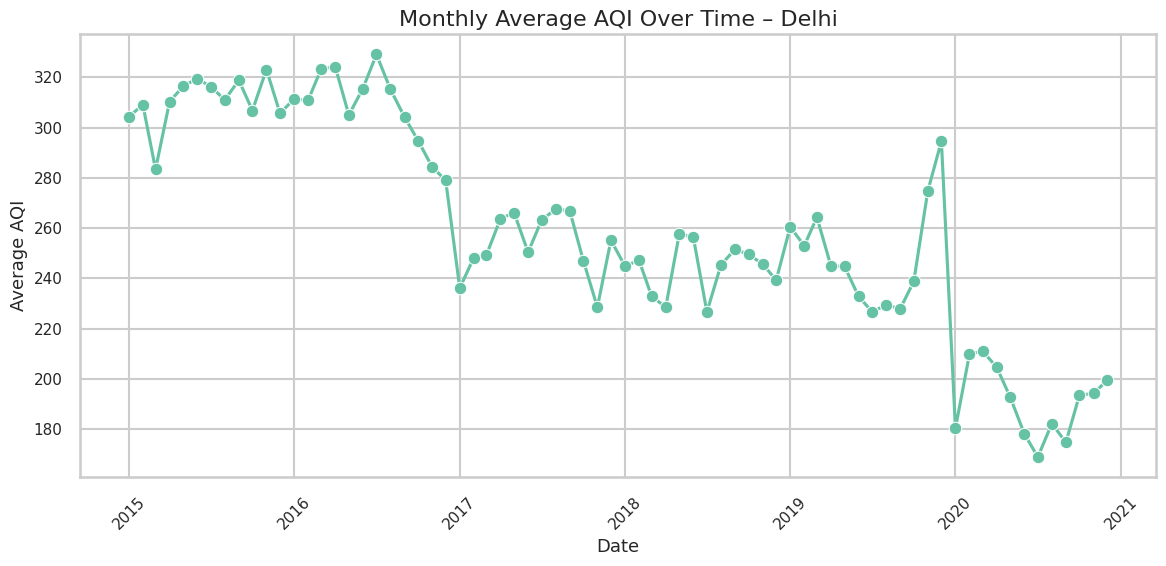

In [18]:
city_name = "Delhi"  # change to any city name
city_df = clean_data[clean_data["City"] == city_name]

# Monthly AQI
monthly_aqi = city_df.groupby(["Year", "Month"])["AQI"].mean().reset_index()

# Convert types
monthly_aqi["Year"] = monthly_aqi["Year"].astype(int)
monthly_aqi["Month"] = monthly_aqi["Month"].astype(int)

# Create date column
monthly_aqi["YearMonth"] = pd.to_datetime(
    monthly_aqi["Year"].astype(str) + "-" + monthly_aqi["Month"].astype(str) + "-01",
    format="%Y-%m-%d"
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="YearMonth", y="AQI", data=monthly_aqi, marker="o")
plt.title(f"Monthly Average AQI Over Time – {city_name}")
plt.xlabel("Date")
plt.ylabel("Average AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Temporal trends in AQI

I analysed the temporal behaviour of air quality by aggregating AQI values at yearly and monthly levels. At the national level, the yearly average AQI provides a high-level indication of whether air quality is improving or deteriorating over time.

I also examined the monthly AQI trend for an individual city (e.g. Delhi), which reveals more detailed seasonal patterns. Typically, certain months show consistently higher AQI values, which may be linked to factors such as winter inversion, crop burning, or festival-related emissions.


2c.5 Pollutant Relationships

(a) PM2.5 vs PM10 Scatter

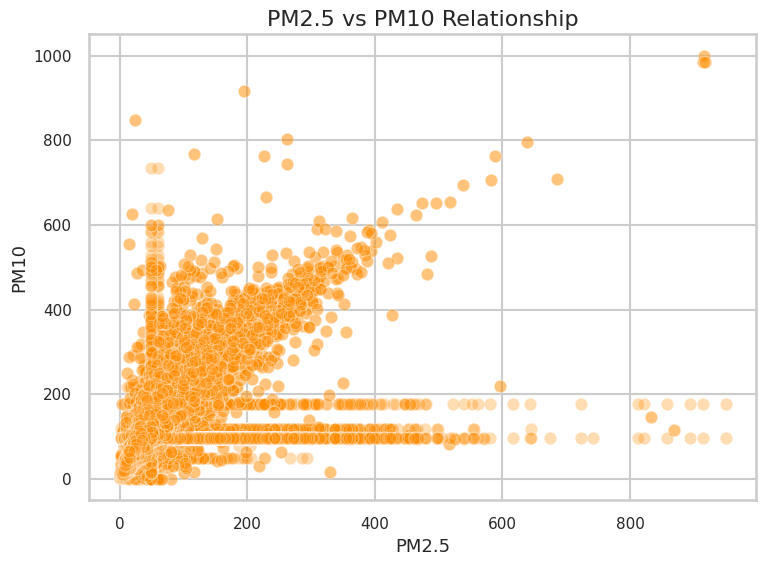

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=clean_data, x="PM2.5", y="PM10", alpha=0.3, color="darkorange")
plt.title("PM2.5 vs PM10 Relationship")
plt.show()


The scatterplot shows a strong positive relationship between PM2.5 and PM10 concentrations. As PM2.5 levels increase, PM10 tends to increase as well. This is expected because both represent particulate pollutants, often originating from similar sources such as vehicle emissions, dust, industrial output, and biomass burning.

The shape of the plot also indicates that extreme PM10 values usually coincide with high PM2.5 episodes. This relationship is important for modelling, as it suggests multicollinearity between the two particulate variables.


(b) Correlation Heatmap

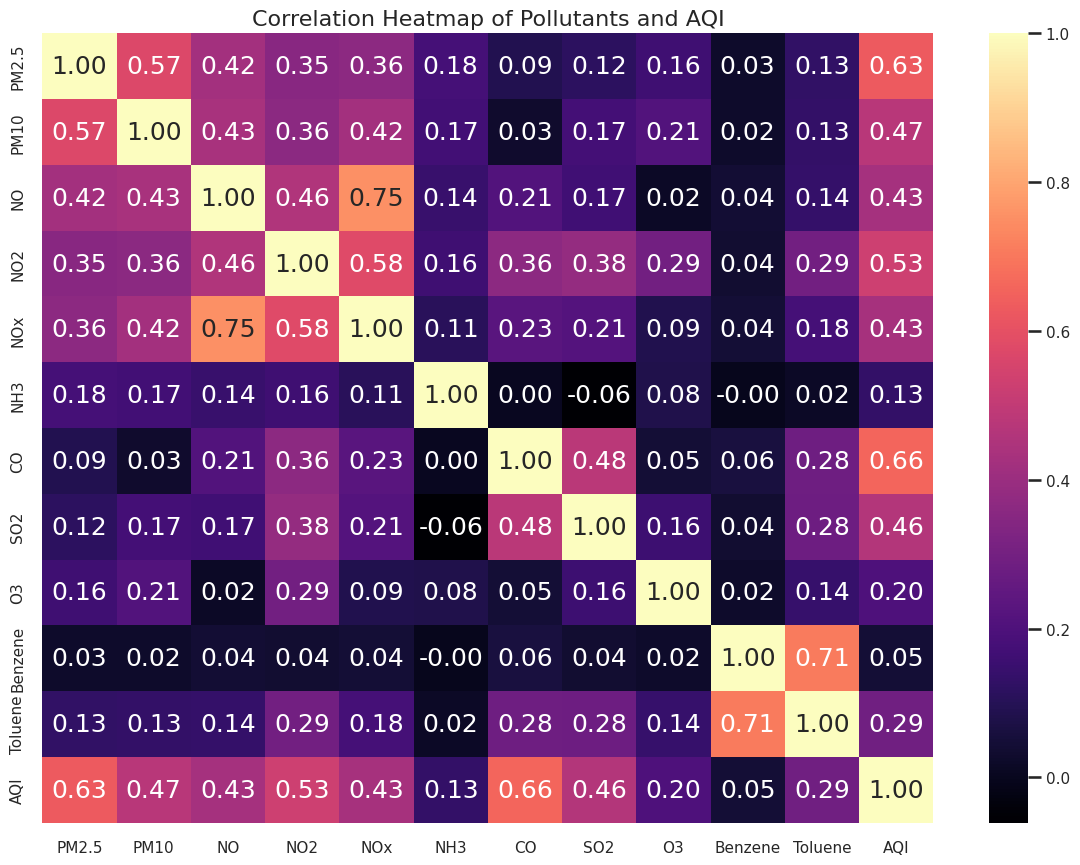

In [20]:
num_cols = ["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","AQI"]
corr_matrix = clean_data[num_cols].corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr_matrix, annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()


#### Relationship between pollutants and AQI

To understand how different pollutants relate to each other and to the AQI, I computed a correlation matrix and visualised it as a heatmap. The heatmap reveals which pollutants are strongly positively correlated (e.g. PM2.5 and PM10) and which have weaker relationships.

As expected, AQI tends to show relatively strong positive correlations with particulate matter (PM2.5, PM10) and certain gaseous pollutants. This confirms that these variables are key drivers of overall air quality and should be considered as important features in the subsequent modelling stage.


2c.6 Trend Smoothing

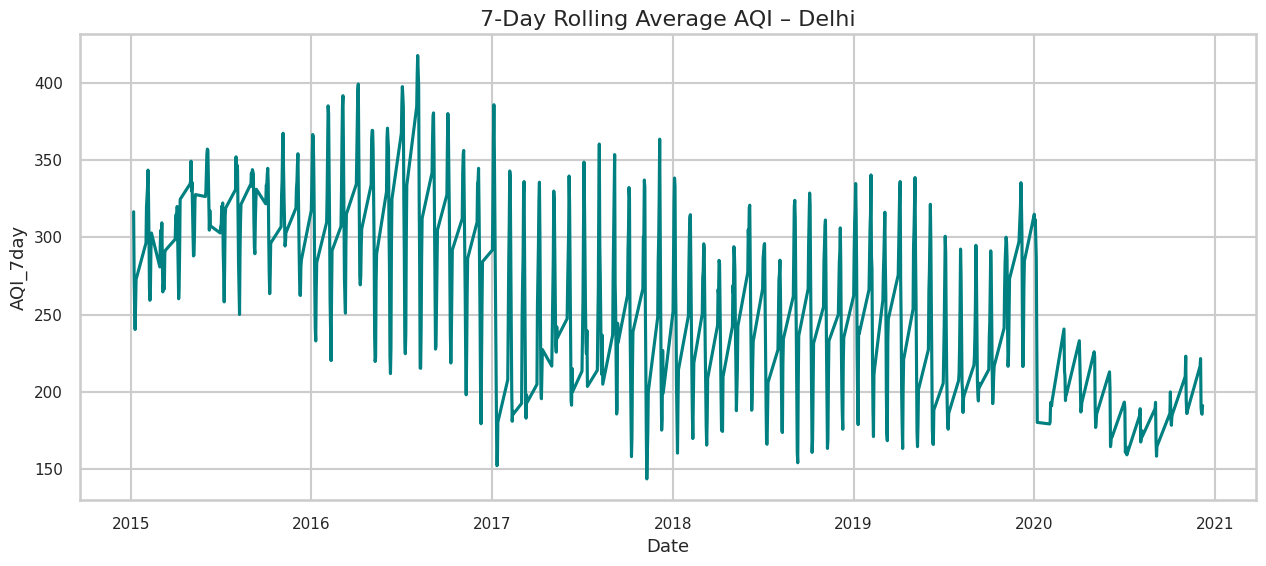

In [21]:
city = "Delhi"
city_df = clean_data[clean_data["City"] == city].sort_values("Date")

city_df["AQI_7day"] = city_df["AQI"].rolling(window=7).mean()

plt.figure(figsize=(13,6))
sns.lineplot(x="Date", y="AQI_7day", data=city_df, color="teal")
plt.title(f"7-Day Rolling Average AQI – {city}")
plt.show()


The rolling average smooths short-term fluctuations in AQI and reveals clearer long-term patterns. Instead of daily variability, the 7-day average highlights gradual increases or decreases in pollution levels.

For the chosen city, the smoothed curve shows periods of sustained high AQI, indicating prolonged pollution episodes. These episodes may correspond to seasonal changes, local emission spikes, or external environmental factors. Rolling averages are widely used in time-series analysis to improve trend interpretation and reduce noise.


2c.7 AQI Category Disribution

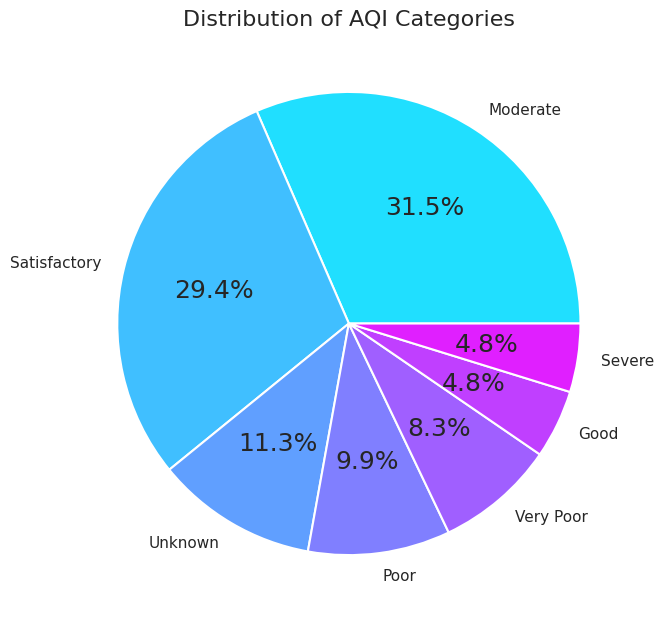

In [22]:
bucket_counts = clean_data["AQI_Bucket"].value_counts()
colors = sns.color_palette("cool", len(bucket_counts))

plt.figure(figsize=(7,7))
plt.pie(bucket_counts.values, labels=bucket_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Distribution of AQI Categories")
plt.show()


This pie chart summarises the proportion of days falling under each AQI category. It provides a quick understanding of the overall health risk level represented in the dataset.

A large share of days in categories such as “Moderate”, “Poor”, or “Very Poor” indicates persistent air-quality challenges across the cities included in this study. Conversely, a higher proportion of “Good” or “Satisfactory” days would reflect cleaner atmospheric conditions. This distribution helps assess the general severity of pollution in the dataset and supports comparisons between cities or time periods.


## Task 3 Model Building
In this section, I build machine learning models to predict AQI using pollutant concentrations and city-level information. The process includes feature selection, data preprocessing, model training and evaluation, and comparison of different algorithms.


3.1 - Prepare data and choose features

In [23]:
import pandas as pd
import numpy as np

# We start from the cleaned dataset
df = clean_data.copy()

print("Columns available in clean_data:")
print(df.columns.tolist())
print("\nShape:", df.shape)


Columns available in clean_data:
['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month']

Shape: (56025, 18)


3.2 Define target and feature + split data

In [24]:
from sklearn.model_selection import train_test_split

# 1. Define target
target = "AQI"

# 2. Candidate features we want to use
candidate_features = [
    "PM2.5", "PM10", "NO", "NO2", "NOx", "NH3",
    "CO", "SO2", "O3", "Benzene", "Toluene",
    "City", "Year", "Month"
]

# 3. Keep only features that actually exist in the dataframe (safety)
features = [f for f in candidate_features if f in df.columns]

print("Using features:")
print(features)

# 4. Drop rows where target is missing (just in case)
df_model = df.dropna(subset=[target]).copy()

X = df_model[features]
y = df_model[target]

print("\nFinal modelling dataset shape:", X.shape)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Using features:
['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'City', 'Year', 'Month']

Final modelling dataset shape: (56025, 14)

Train shape: (44820, 14)
Test shape: (11205, 14)


3.3 Build preprocessing pipeline (encode + scale)

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate numeric and categorical features
cat_features = ["City"]
num_features = [col for col in features if col != "City"]

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

# Numeric transformer: impute missing with median, then scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical transformer: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Full preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)


Numeric features: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Year', 'Month']
Categorical features: ['City']


3.4 Model 1: Linear Regression (baseline)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Build pipeline: preprocessing + Linear Regression model
lin_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

# Train (fit) the model
lin_model.fit(X_train, y_train)

# Predict on test set
y_pred_lin = lin_model.predict(X_test)

# Evaluate
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print("MAE :", mae_lin)
print("RMSE:", rmse_lin)
print("R²  :", r2_lin)


Linear Regression Performance:
MAE : 31.790292312811808
RMSE: 60.93838492927359
R²  : 0.791316135593895


3.5 Model 2: Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)


Random Forest Performance:
MAE : 13.395605013845477
RMSE: 29.041734816098476
R²  : 0.9526028637970255
